In [7]:
import ORCA_plot as utl
import matplotlib.pyplot as plt
import numpy as np
import os

In [8]:
file_Cu_I = np.loadtxt(os.path.join("data", "Cu_I.out.abs.stk"))
file_Cu_II = np.loadtxt(os.path.join("data", "Cu_II.out.abs.stk"))

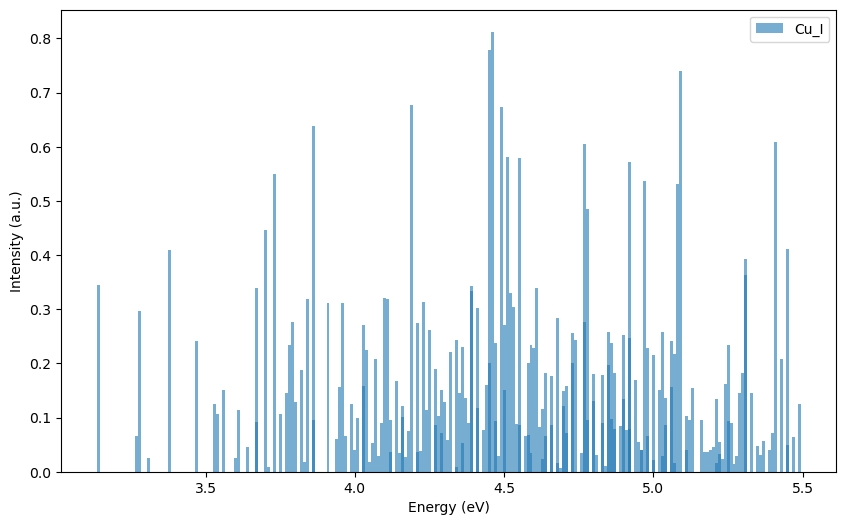

In [9]:
Cu_I = utl.plot(file_Cu_I, plot_bar = True, name = "Cu_I", x_name = "Energy (eV)", y_name = "Intensity (a.u.)", width = 0.01, normalized = False)

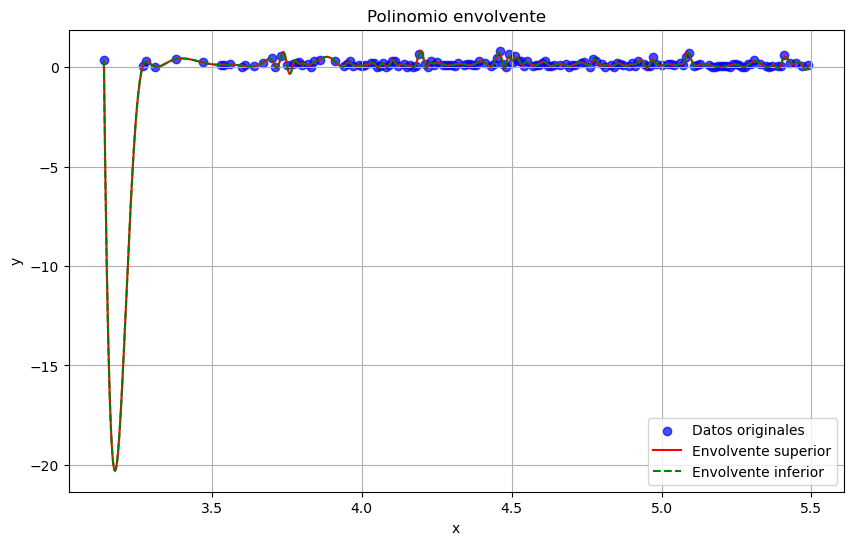

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Supongamos que file_Cu_I ya está definido como un array de numpy

# Separar los datos en x e y
x = file_Cu_I[:, 0]
y = file_Cu_I[:, 1]

# Eliminar duplicados en x tomando el promedio de y para esos valores
unique_x, indices = np.unique(x, return_inverse=True)
average_y = np.array([y[indices == i].mean() for i in range(len(unique_x))])

# Crear un ajuste spline para la envolvente superior
spline_upper = UnivariateSpline(unique_x, average_y, k=4)
spline_upper.set_smoothing_factor(0.5)

# Crear un ajuste spline para la envolvente inferior (si lo deseas)
spline_lower = UnivariateSpline(unique_x, -average_y, k=4)
spline_lower.set_smoothing_factor(0.5)

# Puntos para graficar
x_dense = np.linspace(np.min(unique_x), np.max(unique_x), 1000)
y_upper = spline_upper(x_dense)
y_lower = -spline_lower(x_dense)

# Graficar los datos y las envolventes
plt.figure(figsize=(10, 6))
plt.scatter(unique_x, average_y, color='blue', label='Datos originales', alpha=0.7)
plt.plot(x_dense, y_upper, color='red', label='Envolvente superior')
plt.plot(x_dense, y_lower, color='green', label='Envolvente inferior', linestyle='--')
plt.xlabel('x')
plt.xlim(3.5, 5)
plt.ylabel('y')
plt.title('Polinomio envolvente')
plt.legend()
plt.grid()
plt.show()


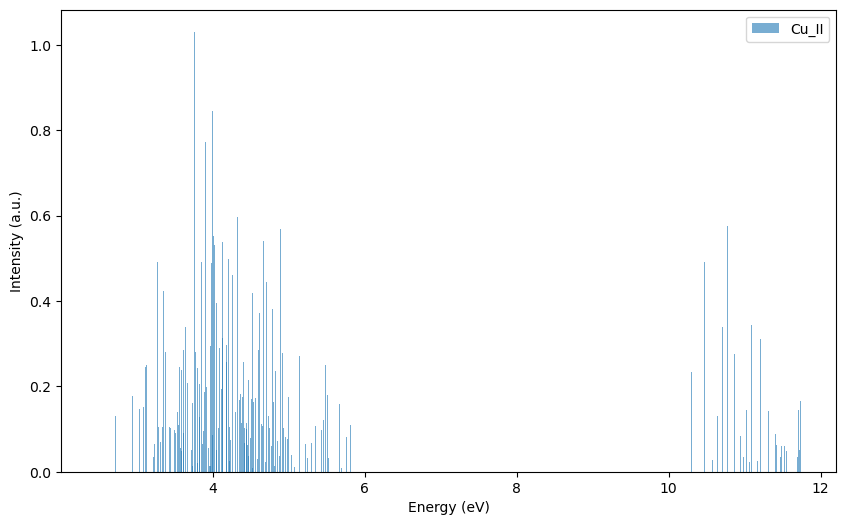

In [10]:
Cu_II = utl.plot(file_Cu_II, plot_bar = True, name = "Cu_II", x_name = "Energy (eV)", y_name = "Intensity (a.u.)", width = 0.01, normalized = False)

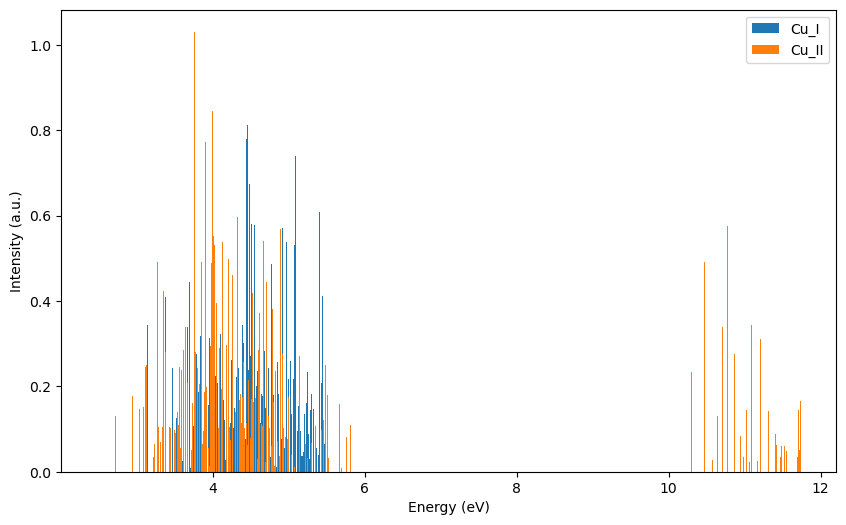

In [11]:
data_list = [
    {"file": file_Cu_I, "name": "Cu_I"},
    {"file": file_Cu_II, "name": "Cu_II"}
]

plt.figure(figsize=(10, 6))

for data in data_list:
    name, x, y_normalized = utl.plot(data["file"], plot=False, name=data["name"])
    plt.bar(x, y_normalized, label=name, width=0.01 )


plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (a.u.)")
plt.legend()
plt.show()